## Introduction

This notebook is dedicated to Binary Classification using a Bank Churn Dataset.

The purpose of this notebook is to train and evaluate various classification models on a dataset with the aim of predicting customer churn. The models used include logistic regression, random forest, gradient boosting, and XGBoost. To gauge the effectiveness of each model, evaluation metrics like accuracy, classification reports, confusion matrices, and ROC curves are utilized.


In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# import xgboostclassifier
# from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


# 1. Data Exploration: <a name="data"></a>
- The dataset for this competition (both train and test) was generated from a deep learning model trained on the [Bank Customer Churn Prediction dataset](https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction). Feature distributions are close to, but not exactly the same, as the original.

## Data Description:

- **Customer ID:** A unique identifier for each customer
- **Surname:** The customer's surname or last name
- **Credit Score:** A numerical value representing the customer's credit score
- **Geography:** The country where the customer resides
- **Gender:** The customer's gender
- **Age:** The customer's age.
- **Tenure:** The number of years the customer has been with the bank
- **Balance:** The customer's account balance
- **NumOfProducts:** The number of bank products the customer uses (e.g., savings account, credit card)
- **HasCrCard:** Whether the customer has a credit card
- **IsActiveMember:** Whether the customer is an active member
- **EstimatedSalary:** The estimated salary of the customer
- **Exited:** Whether the customer has churned (Prediction Variable)

In [22]:
df_train = pd.read_csv(r'C:\Users\yashw\Downloads\playground-series-s4e1\train.csv')
df_test = pd.read_csv(r"C:\Users\yashw\Downloads\playground-series-s4e1\test.csv")

In [23]:
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [24]:
df_test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [25]:
# Printing information and descriptive statistics for df_train
print("Training Data Information:")
print(df_train.info())
print("\nTraining Data Descriptive Statistics:")
print(df_train.describe().T)

# Printing information and descriptive statistics for df_test
print("\nTesting Data Information:")
print(df_test.info())
print("\nTesting Data Descriptive Statistics:")
print(df_test.describe().T)

Training Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB
None

Training Data Descriptive Statistics:
   

# 2. Exploritory Data Analysis <a name="eda"></a>
- Exploratory Data Analysis (EDA) is an analysis approach that identifies general patterns in the data. These patterns include outliers and features of the data that might be unexpected. EDA is an important first step in any data analysis.

## 2.1 Null Values:

In [26]:
# Generate formatted string representation of isnull count for train data
train_isnull_count = df_train.isnull().sum().to_string()

# Generate formatted string representation of isnull count for test data
test_isnull_count = df_test.isnull().sum().to_string()

# Print the formatted output
print("Train data isnull count:\n", train_isnull_count, "\n\nTest data isnull count:\n", test_isnull_count)

Train data isnull count:
 id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0 

Test data isnull count:
 id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0


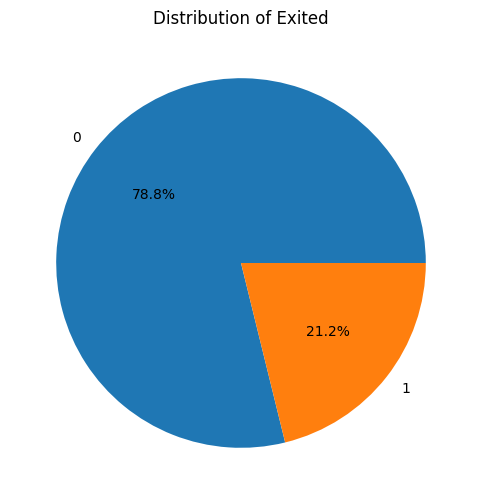

In [27]:
# Explore distribution of the target variable
exited_counts = df_train['Exited'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(exited_counts, labels = exited_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Exited')
plt.show()

## 2.3 Categorical Variables Analysis:    
In statistics, a categorical variable (also called qualitative variable) is a variable with a set number of groups (gender, colors of the rainbow, brands of cereal). 

In our data categorical varibles are:

- Geography 
- Gender
- Tenure
- NumOfProducts
- HasCrCard
- IsActiveMember

In [28]:
# Identify categorical variables based on unique value counts
categorical_vars = []
continuous_vars = []

for col in df_train.columns:
    unique_vals = df_train[col].unique()
    if len(unique_vals) <= 10:  # Adjust the threshold as needed
        categorical_vars.append(col)
    else:
        continuous_vars.append(col)

# Convert to lists
categorical_vars_list = list(categorical_vars)
continuous_vars_list = list(continuous_vars)

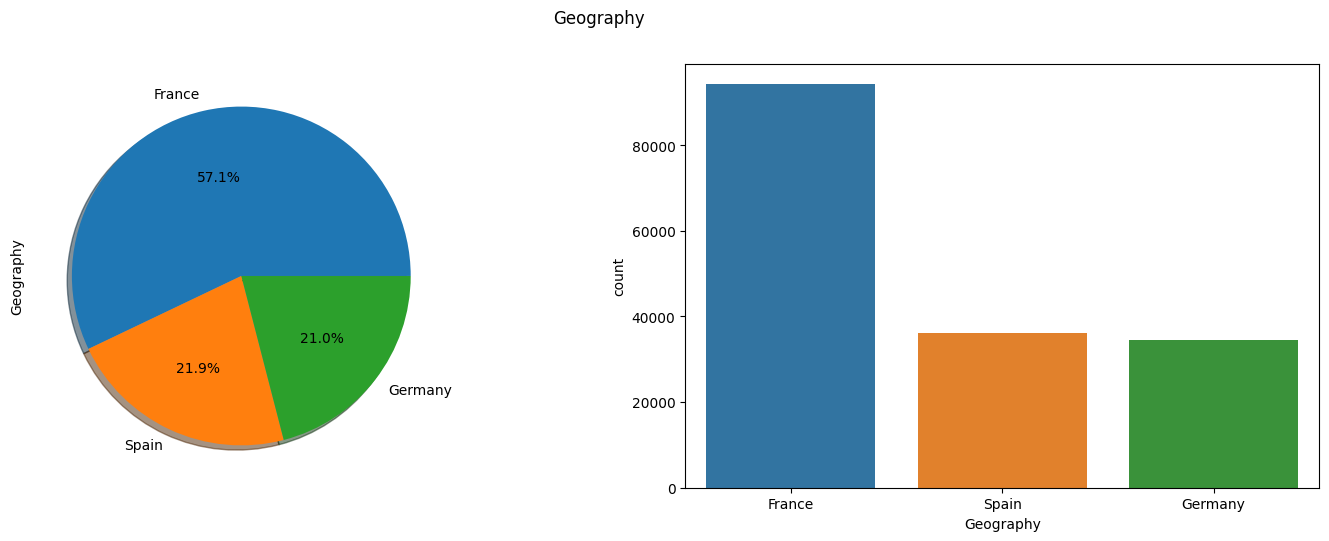

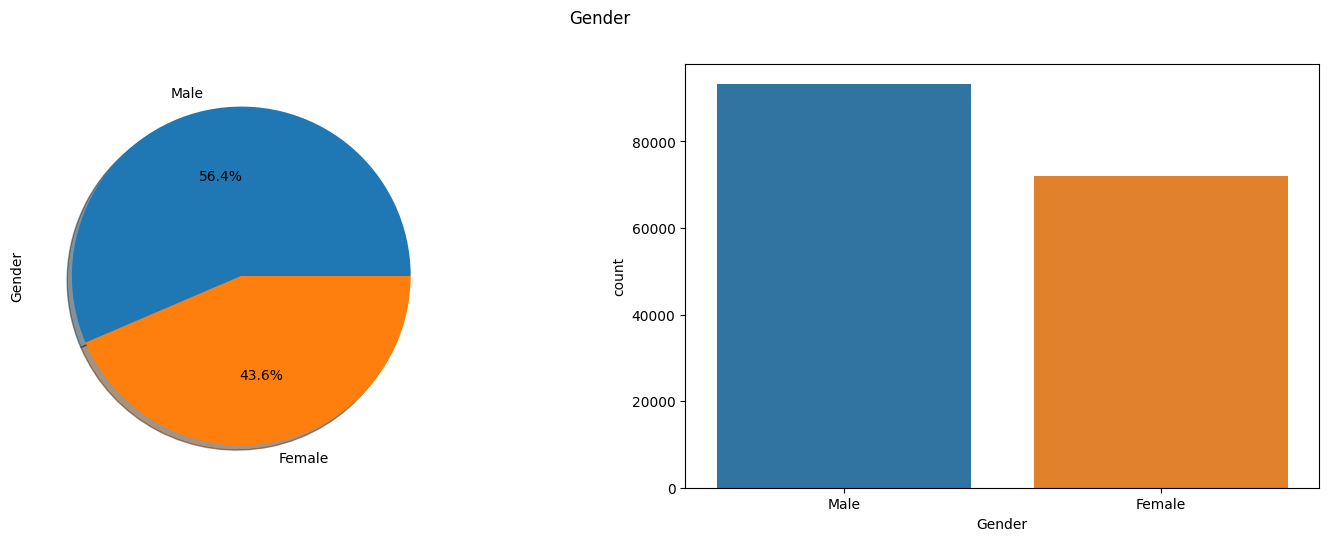

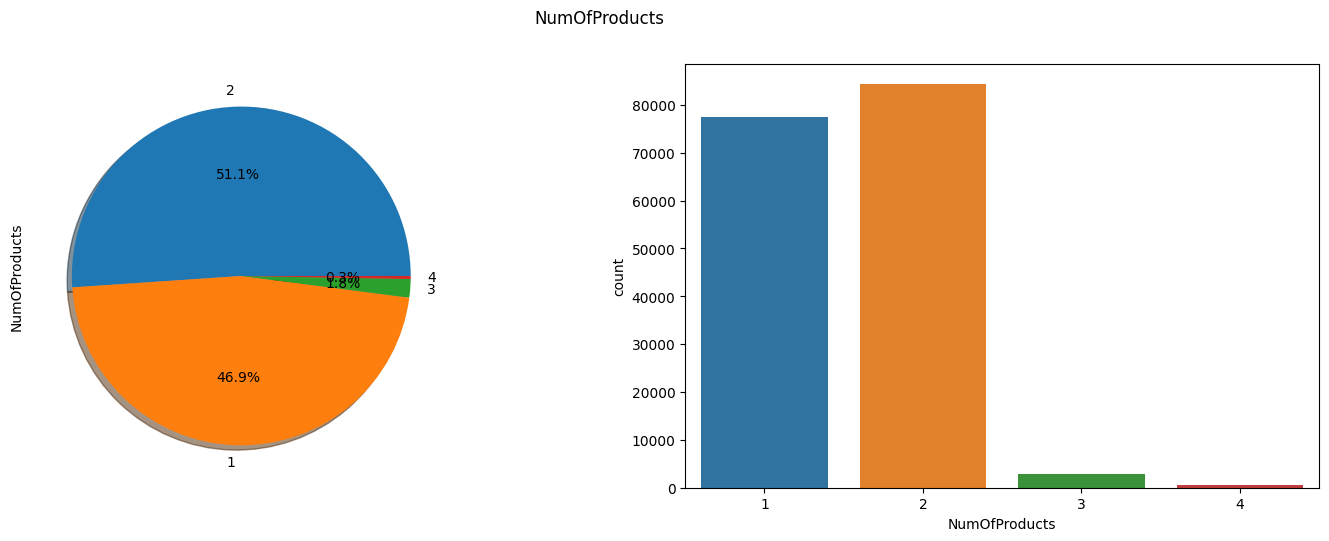

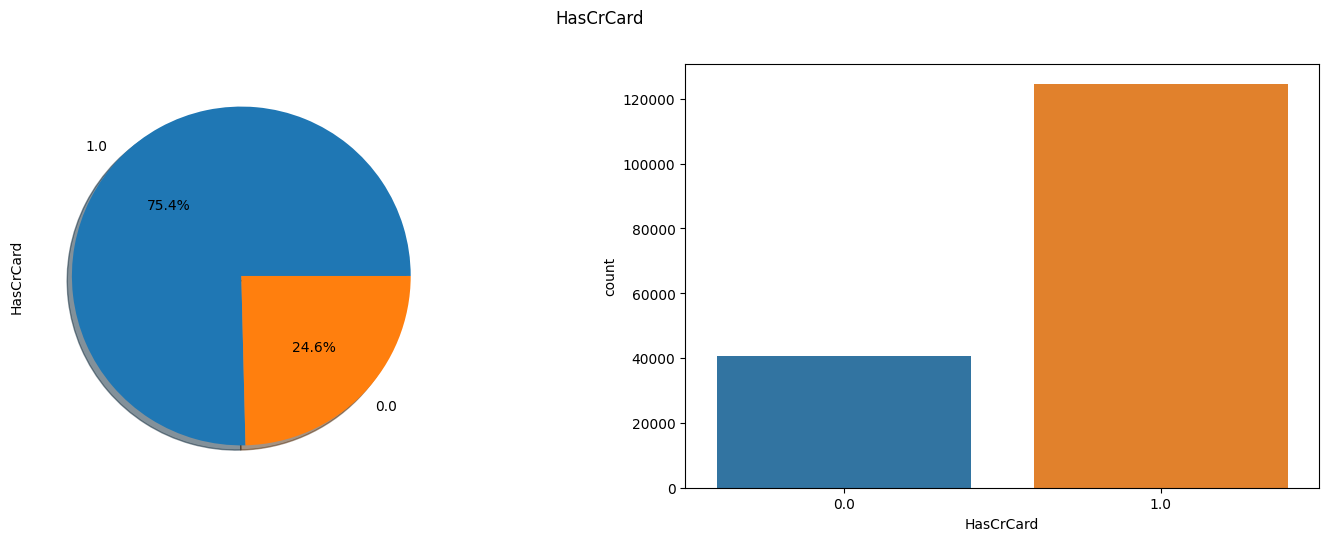

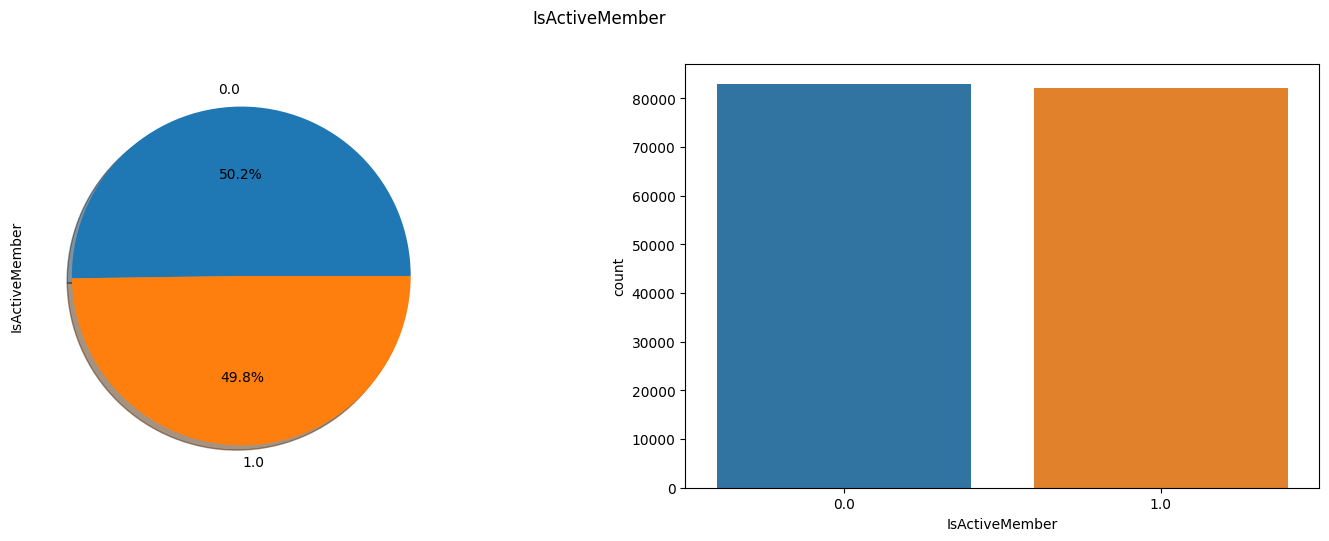

In [29]:
categorical_vars.remove('Exited')

# Define your color palette for the plots
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
palette = sns.color_palette(colors)

for column in categorical_vars:
    f,ax=plt.subplots(1,2,figsize=(18,5.5))
    df_train[column].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, colors=colors)
    ax[0].set_ylabel(f'{column}')
    sns.countplot(x=column,data=df_train,ax=ax[1], palette=palette)
    plt.suptitle(f'{column}')
    plt.show()

### Some Observations from above plots:

- Some of the variables like `IsActiveMember`, `Tenure` and `Gender` are almost equaly distributed while the other variables like `HasCrCard`, `NumOfProducts`, and `Gender` are not equaly distributed.


## 2.4 Numerical Value Analysis:
In Mathematics, if a variable can take on two or more distinct real values so that it can also take all real values between them (even values that are randomly close together). In this case, the variable is continuous in the given interval.

In our data Continuous variables are:

- CreditScore
- Age
- Balance
- EstimatedSalary

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


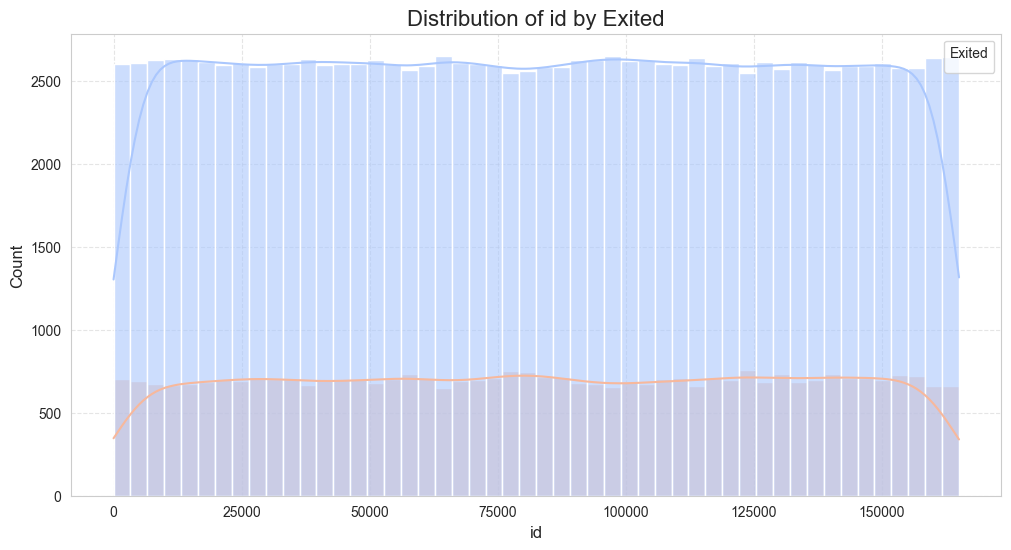

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


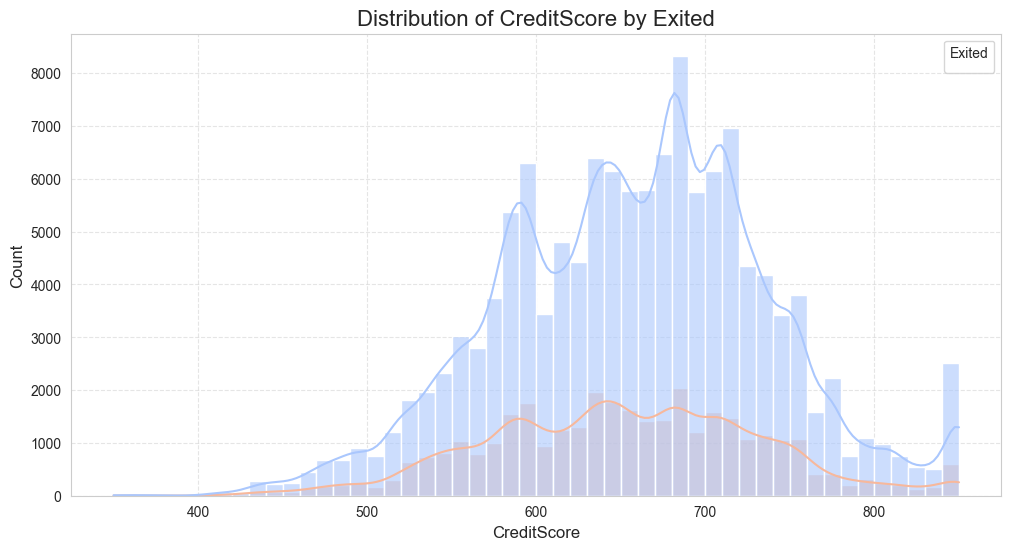

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


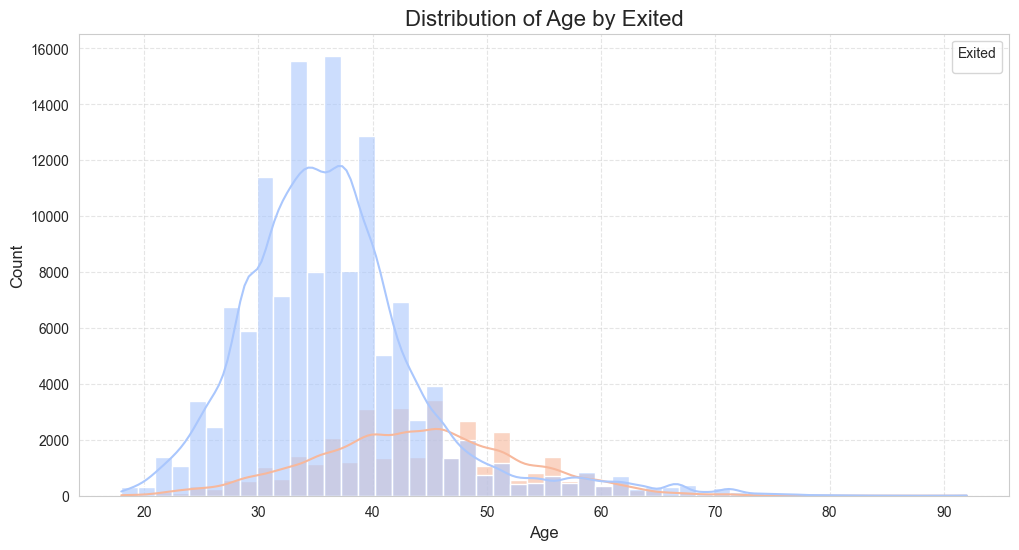

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


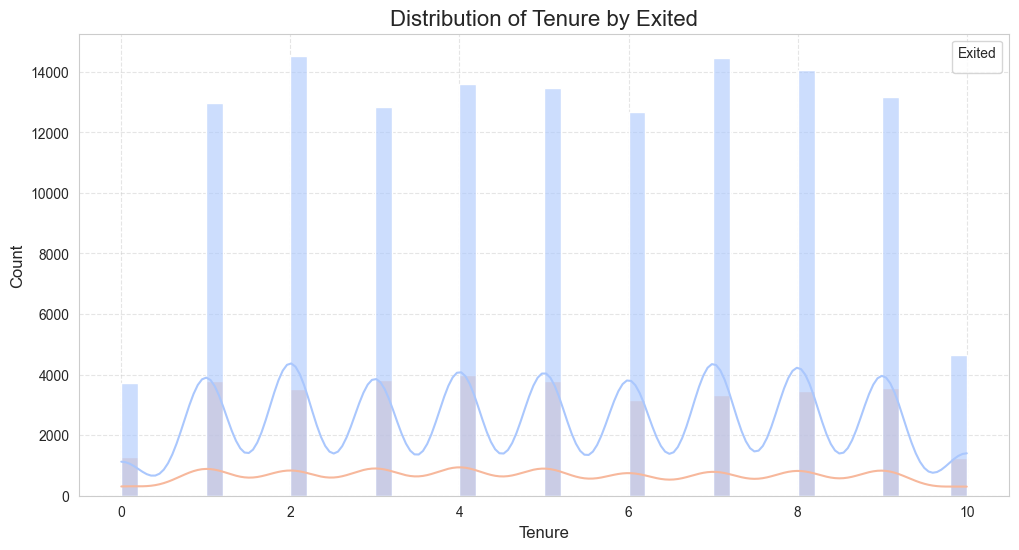

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


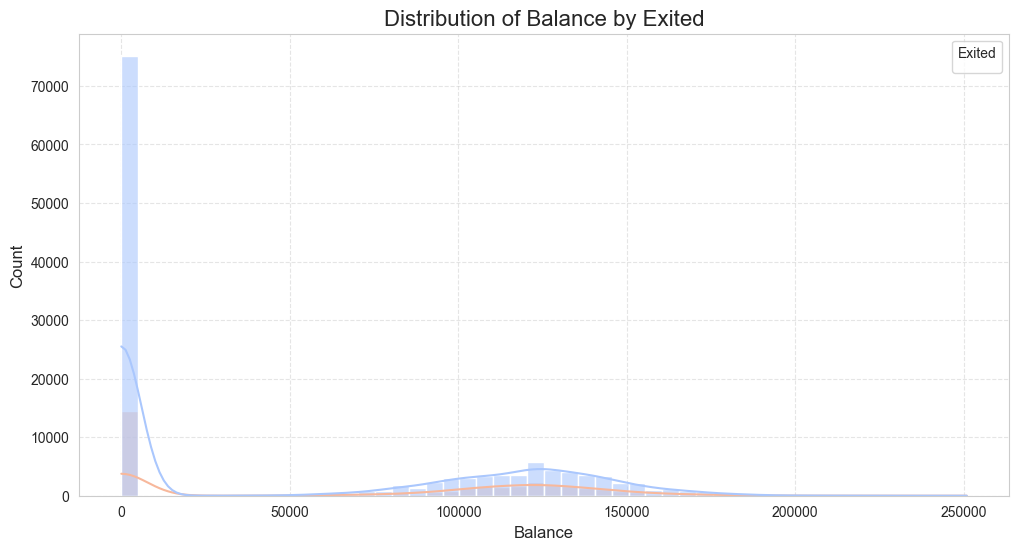

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


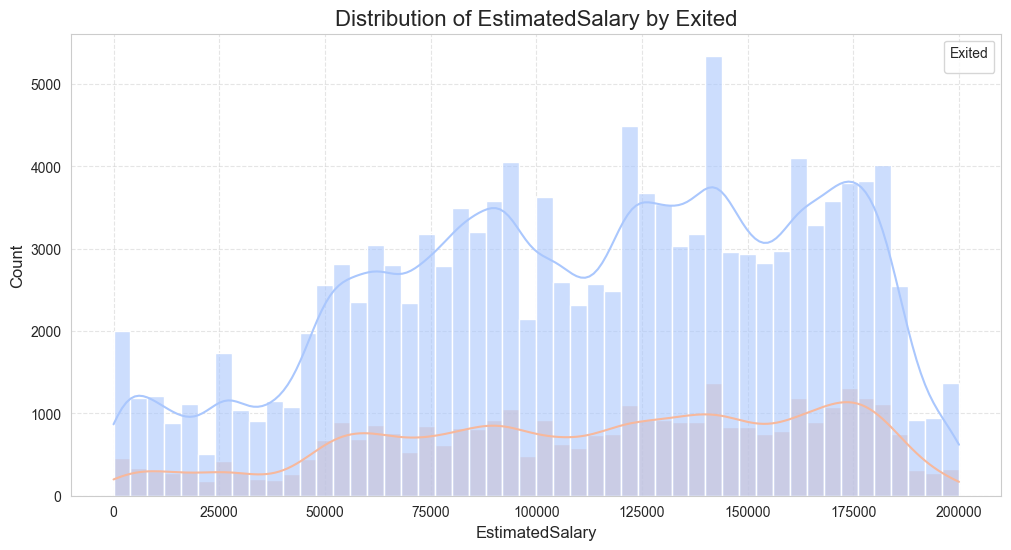

In [30]:
# Remove 'CustomerId' and 'Surname' from continuous_vars_list
continuous_vars_list.remove('CustomerId')
continuous_vars_list.remove('Surname')

# Customize seaborn style
sns.set_style("whitegrid")

# Define color palette
palette = sns.color_palette("coolwarm", 2)

# Loop through continuous variables for plotting
for column in continuous_vars_list:
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.histplot(data=df_train, x=column, hue="Exited", bins=50, kde=True, palette=palette, alpha=0.6)
    
    # Set title and labels
    ax.set_title(f"Distribution of {column} by Exited", fontsize=16)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    
    # Customize legend
    ax.legend(title='Exited', fontsize=10)
    
    # Add grid
    plt.grid(True, linestyle='--', alpha=0.5)
    
    plt.show()


## 2.5 Correlation Analysis:

Correlation analysis examines the statistical relationship between two variables, revealing both the strength and direction of their association.

### Types of Correlation:

- **Positive Correlation:** When two variables exhibit a positive correlation, their values move in the same direction.
  
- **Neutral Correlation:** In cases of neutral correlation, there is no discernible relationship between the variables; their changes appear random.

- **Negative Correlation:** Variables demonstrate a negative correlation when their values change in opposite directions.

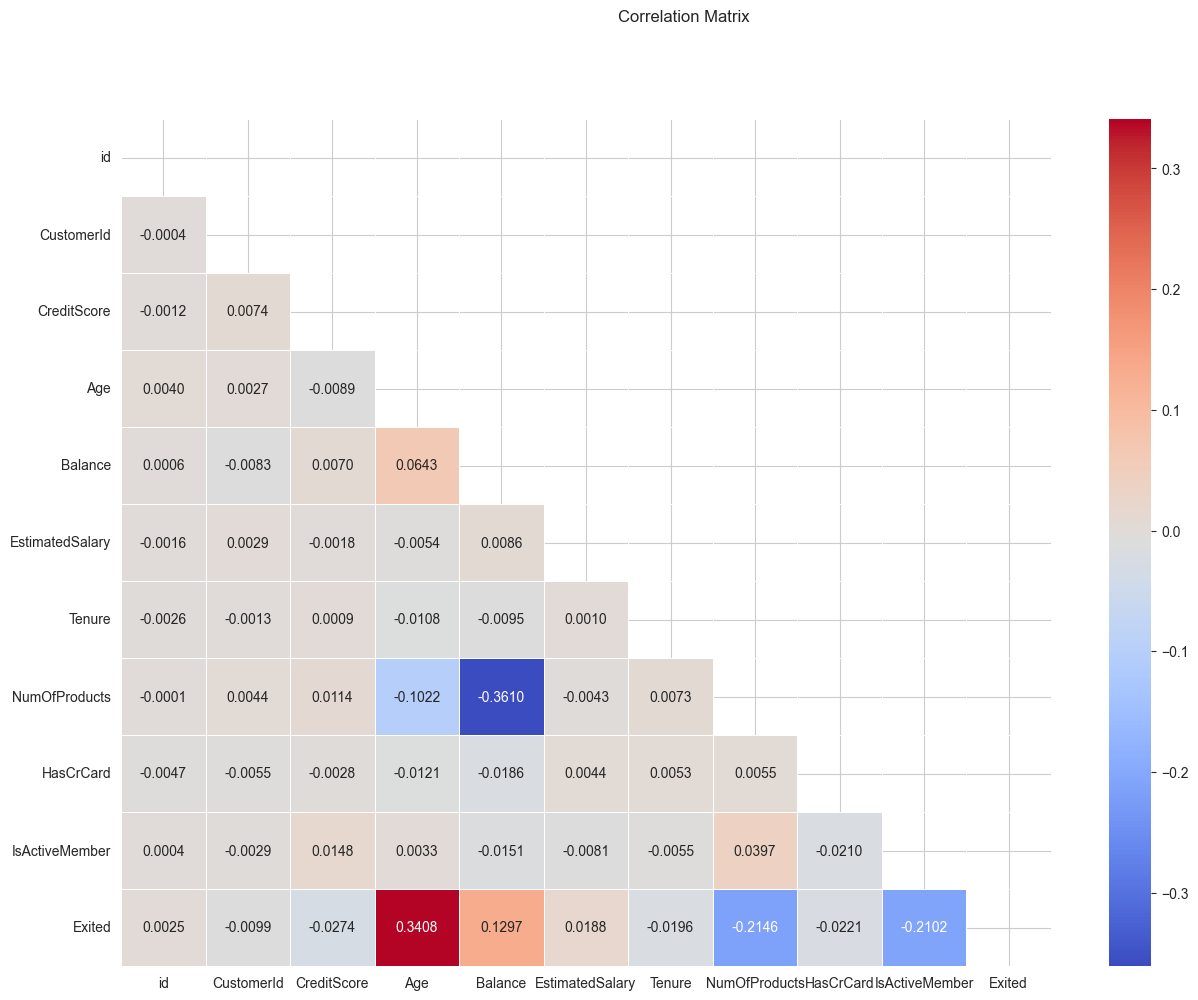

In [31]:
# Compute the correlation matrix
df1 = df_train[['id', 'CustomerId', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary', 
       'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']].copy()

corr_matrix  = df1.corr()

# Create a mask to hide the upper triangle
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap
f, ax = plt.subplots(figsize=(15, 11))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".4f", linewidths=0.5)
plt.suptitle('Correlation Matrix')
plt.show()


In [32]:
from xgboost import XGBClassifier

# 3. Modelling <a name="model"></a>


This part of the code performs hyperparameter tuning using randomized search with cross-validation for four different machine learning models: Logistic Regression, Random Forest, Gradient Boosting, and XGBoost.

For each model:
- A pipeline is created, which includes preprocessing steps (standard scaling for numerical features and one-hot encoding for categorical features) followed by the model itself.
- Reduced parameter distributions are defined for the model's hyperparameters. These parameter distributions contain a limited set of values for hyperparameters to reduce the search space and speed up the process.
- Randomized search with cross-validation is performed using the `RandomizedSearchCV` class. This technique randomly samples a fixed number of hyperparameter combinations from the specified distributions and evaluates their performance using cross-validation.
- After fitting, the best model obtained from the randomized search is extracted.
- The best model is then used to make predictions on the validation set.
- Finally, various model evaluation metrics such as accuracy, classification report, confusion matrix, and ROC curve are printed or plotted to assess the performance of each model.

1. **Logistic Regression:**
   - Logistic Regression is a statistical method used for modeling the probability of a binary outcome.
   - It's a type of regression analysis where the dependent variable is binary, and it estimates the probability that a given input belongs to a particular class.
   - Despite its name, logistic regression is primarily used for classification rather than regression tasks.
   - It assumes a linear relationship between the independent variables and the log-odds of the dependent variable.

2. **Random Forest:**
   - Random Forest is an ensemble learning method that operates by constructing a multitude of decision trees during training.
   - Each tree in the forest independently predicts the output class, and the final output is determined by voting or averaging over all the individual trees.
   - It's known for its high accuracy, robustness to overfitting, and capability to handle large datasets with high dimensionality.
   - Random Forest can handle both classification and regression tasks.

3. **Gradient Boosting:**
   - Gradient Boosting is a machine learning technique for regression and classification problems.
   - It builds an ensemble of weak prediction models, typically decision trees, in a sequential manner.
   - Each new model in the sequence corrects the errors made by the previous models, focusing more on the instances that were incorrectly predicted.
   - Gradient Boosting aims to minimize a loss function (e.g., mean squared error for regression, log loss for classification) by iteratively adding new models.

4. **XGBoost (Extreme Gradient Boosting):**
   - XGBoost is an optimized implementation of Gradient Boosting.
   - It's known for its scalability, speed, and performance.
   - XGBoost includes additional regularization terms to control model complexity and prevent overfitting.
   - It's widely used in various machine learning competitions and has become a popular choice for structured/tabular data tasks.
   


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Model: Logistic Regression
Best Parameters: {'model__penalty': 'l2', 'model__C': 10}
Accuracy: 0.8551519374678098
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     26023
           1       0.72      0.51      0.60      6984

    accuracy                           0.86     33007
   macro avg       0.80      0.73      0.76     33007
weighted avg       0.85      0.86      0.85     33007



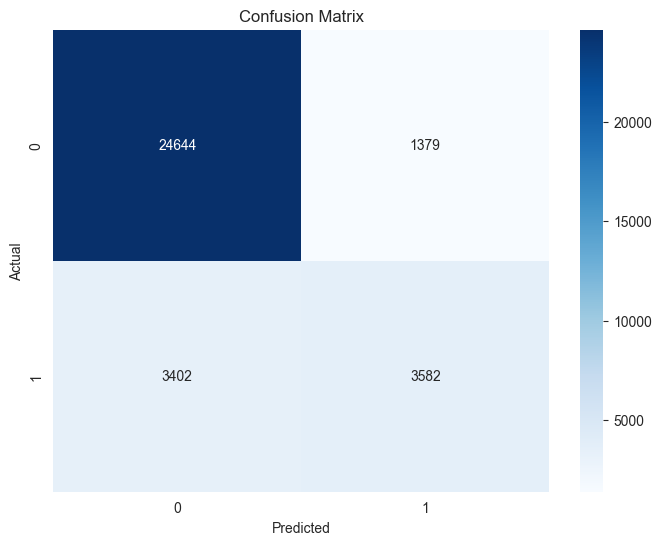

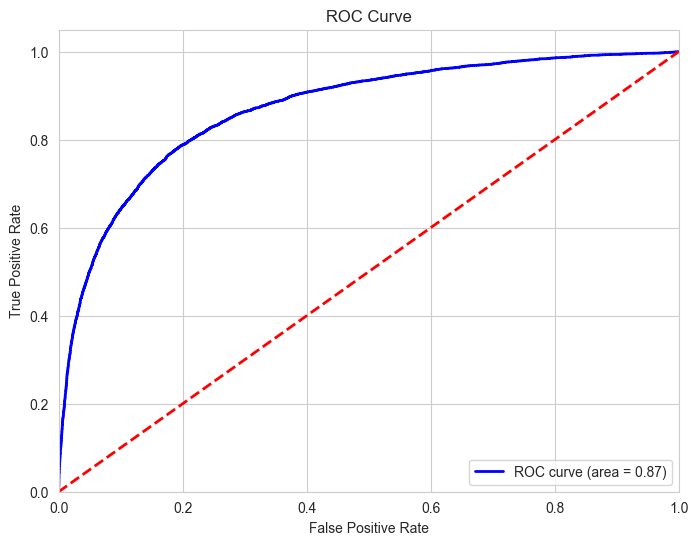

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Model: Random Forest
Best Parameters: {'model__n_estimators': 200, 'model__max_depth': 10}
Accuracy: 0.8616354106704638
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     26023
           1       0.77      0.49      0.60      6984

    accuracy                           0.86     33007
   macro avg       0.82      0.73      0.76     33007
weighted avg       0.85      0.86      0.85     33007



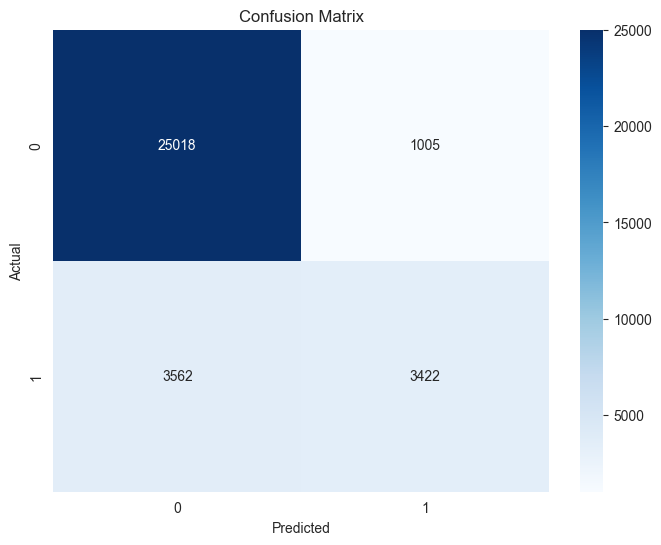

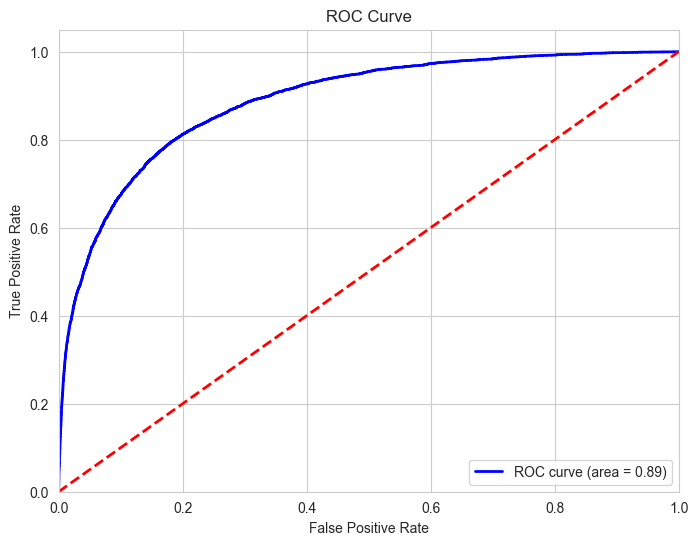

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Model: Gradient Boosting
Best Parameters: {'model__n_estimators': 200, 'model__max_depth': 4, 'model__learning_rate': 0.1}
Accuracy: 0.8657860453843124
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     26023
           1       0.75      0.55      0.63      6984

    accuracy                           0.87     33007
   macro avg       0.82      0.75      0.78     33007
weighted avg       0.86      0.87      0.86     33007



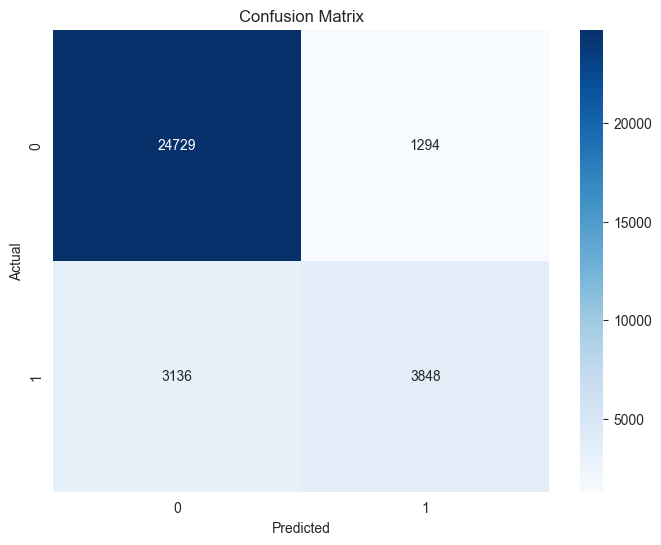

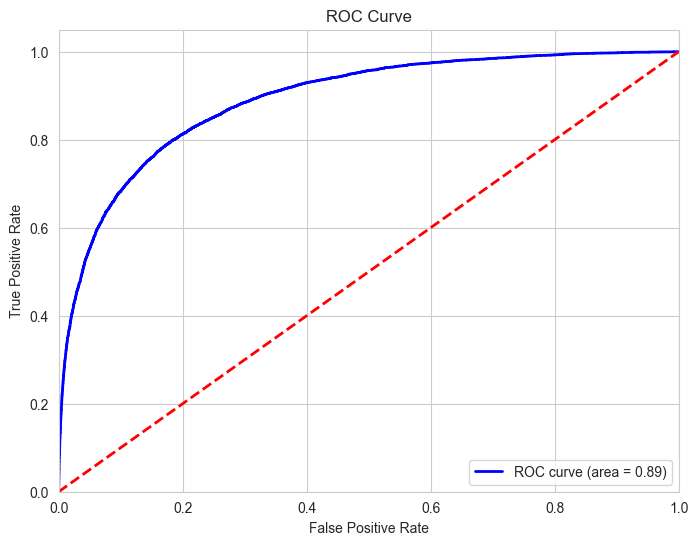

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Model: XGBoost
Best Parameters: {'model__max_depth': 4, 'model__learning_rate': 0.1}
Accuracy: 0.8656951555730603
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     26023
           1       0.75      0.55      0.63      6984

    accuracy                           0.87     33007
   macro avg       0.82      0.75      0.78     33007
weighted avg       0.86      0.87      0.86     33007



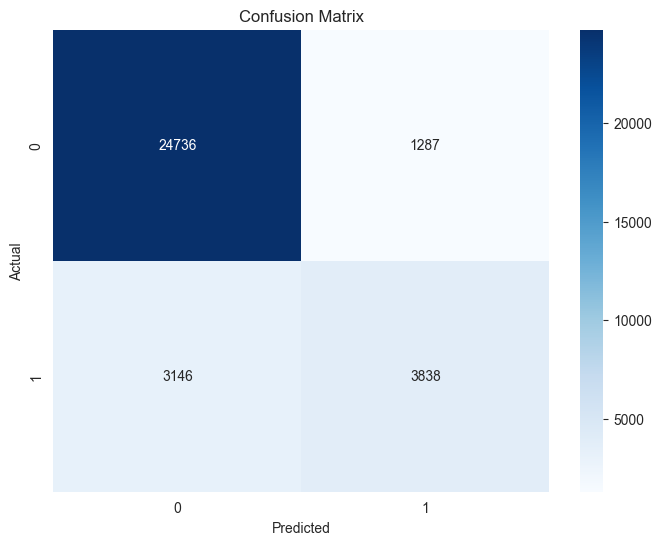

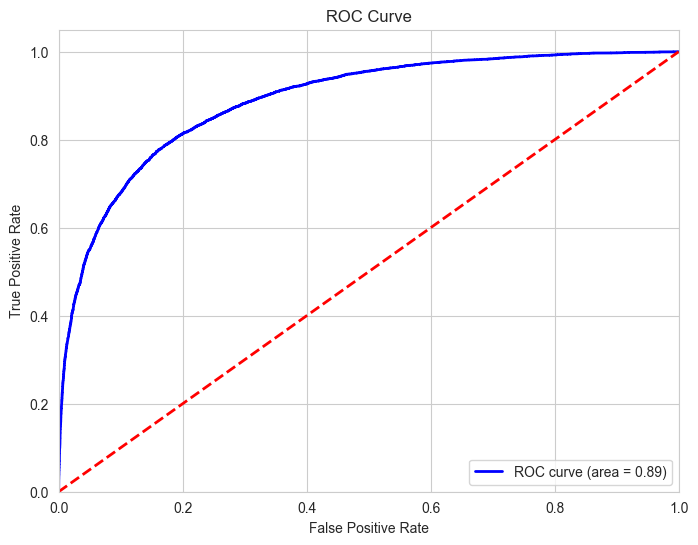

In [33]:
# Split features and target variable
X = df_train.drop(['id', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = df_train['Exited']

# Split train data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']),
        ('cat', OneHotEncoder(drop='first'), ['Geography', 'Gender', 'IsActiveMember', 'HasCrCard', 'NumOfProducts'])
    ],
    remainder='passthrough'
)

# Define models with adjusted hyperparameter grids
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('XGBoost', XGBClassifier())
]

# Perform randomized search with cross-validation for each model
for name, model in models:
    # Create pipeline including data preprocessing and the model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
# Define models with reduced hyperparameter grids
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('XGBoost', XGBClassifier())
]

# Perform randomized search with cross-validation for each model
for name, model in models:
    # Create pipeline including data preprocessing and the model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Define reduced parameter distributions for randomized search
    param_distributions = {}
    if name == 'Logistic Regression':
        param_distributions = {
            'model__C': [0.01, 0.1, 1, 10],
            'model__penalty': ['l1', 'l2']
        }
    elif name == 'Random Forest':
        param_distributions = {
            'model__n_estimators': [100, 200],
            'model__max_depth': [None, 10, 20],
        }
    elif name == 'Gradient Boosting':
        param_distributions = {
            'model__n_estimators': [100, 200],
            'model__learning_rate': [0.01, 0.1],
            'model__max_depth': [3, 4, 5],
        }
    elif name == 'XGBoost':
        param_distributions = {
            'model__max_depth': [3, 4, 5],
            'model__learning_rate': [0.01, 0.1],
        }
    
    # Perform randomized search with cross-validation
    randomized_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=20, cv=3, scoring='roc_auc', verbose=3, n_jobs=-1)
    randomized_search.fit(X_train, y_train)
    
    # Get the best model from randomized search
    best_model = randomized_search.best_estimator_
    
    # Predict on validation set
    y_pred = best_model.predict(X_val)
    
    # Print model evaluation metrics
    print("Model:", name)
    print("Best Parameters:", randomized_search.best_params_)
    print("Accuracy:", accuracy_score(y_val, y_pred))
    print("Classification Report:")
    print(classification_report(y_val, y_pred))
    
    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, cmap='Blues', fmt='g')
    plt.title("Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # ROC Curve
    if hasattr(best_model.named_steps['model'], "predict_proba"):
        y_pred_proba = best_model.predict_proba(X_val)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
        roc_auc = roc_auc_score(y_val, y_pred_proba)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc="lower right")
        plt.show()

# 4.Submission

In [34]:
# Extract features from the test data
test_data = df_test.drop(['CustomerId', 'Surname'], axis=1)

# Make predictions using the best trained model
submission = best_model.predict(test_data)

# Create a submission DataFrame with id and prediction
submission_df = pd.DataFrame({'id': df_test['id'], 'Exited': submission})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)